<a href="https://colab.research.google.com/github/Thiru08V/Ybi_Foundation_Project/blob/main/MRS_Project_Ybi_Foundation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Movie Recommendation System

Objective:-
To create a movie recommendation system that suggests movies to users based on their preferences using machine learning concepts.

Data Source:
We will use the MovieLens dataset (100K version), which contains user ratings for movies.

Step 1: Import Required Libraries

In [ ]:
# Install necessary libraries
!pip install surprise

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Dataset, Reader
from surprise import SVD
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357285 sha256=565cc07e3d6928b70050904f7825de9bd256807dbc5b0baa3b26a861bc0b11ec
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


Step 2: Load the Dataset

In [ ]:
# Download the MovieLens dataset directly
!wget -nc https://files.grouplens.org/datasets/movielens/ml-100k/u.data -O u.data

# Load the dataset into a Pandas DataFrame
column_names = ['user_id', 'movie_id', 'rating', 'timestamp']
data = pd.read_csv("u.data", sep='\t', names=column_names)

# Display the first few rows of the dataset
data.head()

--2024-11-25 06:43:01--  https://files.grouplens.org/datasets/movielens/ml-100k/u.data
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1979173 (1.9M)
Saving to: ‘u.data’

u.data              100%[===================>]   1.89M  11.6MB/s    in 0.2s    

2024-11-25 06:43:01 (11.6 MB/s) - ‘u.data’ saved [1979173/1979173]



,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


Step 3: Describe the Data

In [ ]:
# Data description
print("Shape of the data:", data.shape)
print("\nSummary of the data:")
print(data.describe())

# Check for missing values
print("\nMissing values:", data.isnull().sum())

Shape of the data: (100000, 4)

Summary of the data:
            user_id       movie_id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%       447.00000     322.000000       4.000000  8.828269e+08
75%       682.00000     631.000000       4.000000  8.882600e+08
max       943.00000    1682.000000       5.000000  8.932866e+08

Missing values: user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64


Step 4: Data Visualization

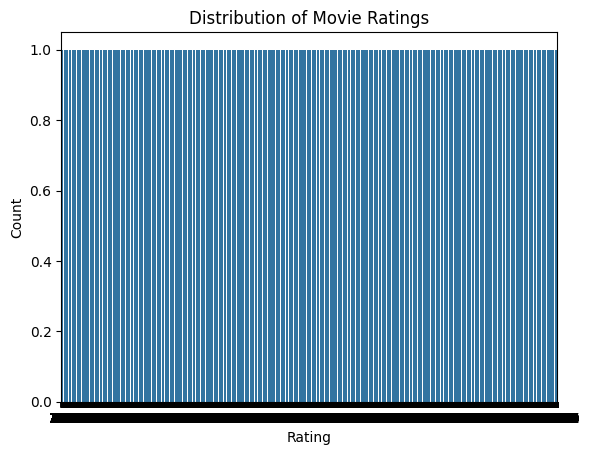

In [ ]:
# Visualize the distribution of ratings
sns.countplot(data['rating'])
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

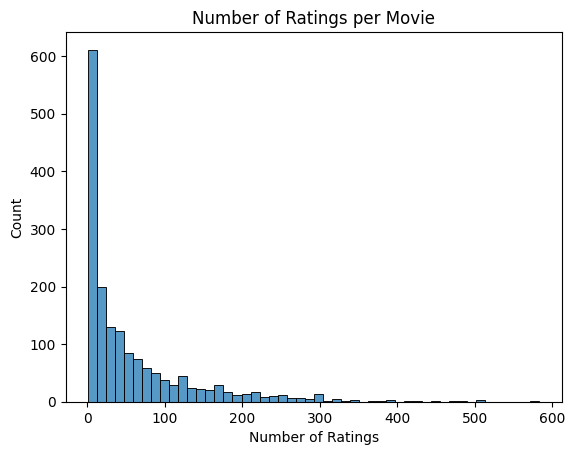

In [ ]:
# Number of ratings per movie
movie_ratings = data['movie_id'].value_counts()
sns.histplot(movie_ratings, bins=50, kde=False)
plt.title("Number of Ratings per Movie")
plt.xlabel("Number of Ratings")
plt.ylabel("Count")
plt.show()

Step 5: Data Preprocessing

In [ ]:
# Remove timestamp column (not needed for recommendation)
data = data.drop('timestamp', axis=1)

# Convert user_id and movie_id to strings (Surprise library requirement)
data['user_id'] = data['user_id'].astype(str)
data['movie_id'] = data['movie_id'].astype(str)

# Define a Reader object for the Surprise library
reader = Reader(rating_scale=(1, 5))

# Load the data into Surprise format
data_surprise = Dataset.load_from_df(data[['user_id', 'movie_id', 'rating']], reader)

Step 6: Define Target Variable (y) and Feature Variables (X)
In recommendation systems, explicit features and target variables are not typically defined. Instead, the model predicts missing ratings in the user-movie matrix.

Step 7: Train-Test Split

In [ ]:
# Split data into training and testing sets
trainset, testset = train_test_split(data_surprise, test_size=0.2, random_state=42)

Step 8: Modeling

In [ ]:
# Use the Singular Value Decomposition (SVD) algorithm
model = SVD()

# Train the model
model.fit(trainset)

Step 9: Model Evaluation

In [ ]:
# Evaluate the model using cross-validation
cross_val_results = cross_validate(model, data_surprise, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print("\nCross-validation results:")
print(pd.DataFrame(cross_val_results).mean())

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9255  0.9395  0.9401  0.9422  0.9362  0.9367  0.0059  
MAE (testset)     0.7287  0.7422  0.7408  0.7437  0.7355  0.7382  0.0055  
Fit time          1.37    1.40    1.39    1.38    1.90    1.49    0.20    
Test time         0.19    0.12    0.14    0.14    0.20    0.16    0.03    

Cross-validation results:
test_rmse    0.936685
test_mae     0.738180
fit_time     1.487710
test_time    0.157917
dtype: float64


Step 10: Prediction

In [ ]:
# Make predictions on the test set
predictions = model.test(testset)

# Display some predictions
for prediction in predictions[:5]:
    print(f"User {prediction.uid} - Movie {prediction.iid} - Actual: {prediction.r_ui} - Predicted: {prediction.est}")

User 907 - Movie 143 - Actual: 5.0 - Predicted: 4.801611156374852
User 371 - Movie 210 - Actual: 4.0 - Predicted: 4.04277779244426
User 218 - Movie 42 - Actual: 4.0 - Predicted: 3.377199538607843
User 829 - Movie 170 - Actual: 4.0 - Predicted: 4.130739394281227
User 733 - Movie 277 - Actual: 1.0 - Predicted: 2.9533385396734064


Step 11: Explanation

In [ ]:
# Predict the rating for a specific user and movie
user_id = '196'  # Example user
movie_id = '242'  # Example movie

predicted_rating = model.predict(user_id, movie_id)
print(f"\nPredicted rating for User {user_id} and Movie {movie_id}: {predicted_rating.est:.2f}")


Predicted rating for User 196 and Movie 242: 3.87
